In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### THE FIRST 114 LINES OF DATA HAVE SOME FORMATTING ISSUES.  SHE DIDN’T USE MILITARY TIME (BUT THE OPEN HOURS ARE 10AM TO 8PM).  ALSO THERE IS SOME VARIATION ON THE DAY OF WEEK SPELLINGS

In [2]:
url = './Haircut_Tip_amounts.xlsx'
df = pd.read_excel(url)
df.head()

,Tip amount,Time,Day,Culture,Married,Age,Unnamed: 6,Unnamed: 7,Culture Codes,Unnamed: 9
0,0,5.0,Fri,I,NM,30.0,NaN,NaN,I,Indian
1,1,2.0,Tue,E,NM,10.0,NaN,NaN,E,European
2,1,7.0,Tues,I,NM,35.0,NaN,NaN,B,African American
3,2,5.0,Mon,I,NM,35.0,NaN,NaN,W,American
4,2,12.0,Fri,M,NM,15.0,NaN,NaN,P,Phillipino


In [3]:
df = df.drop(['Unnamed: 6'], axis=1)

In [4]:
df = df.drop(['Unnamed: 7'], axis=1)

In [5]:
df

,Tip amount,Time,Day,Culture,Married,Age,Culture Codes,Unnamed: 9
0,0,5.0,Fri,I,NM,30.0,I,Indian
1,1,2.0,Tue,E,NM,10.0,E,European
2,1,7.0,Tues,I,NM,35.0,B,African American
3,2,5.0,Mon,I,NM,35.0,W,American
4,2,12.0,Fri,M,NM,15.0,P,Phillipino
...,...,...,...,...,...,...,...,...
229,10,1.0,Sat,W,M,40.0,NaN,NaN
230,1,13.0,Sat,I,NM,10.0,NaN,NaN
231,5,14.0,Sat,W,M,36.0,NaN,NaN
232,3,15.0,Sat,W,NM,8.0,NaN,NaN


In [6]:
df = df.iloc[116:,]

In [7]:
df

,Tip amount,Time,Day,Culture,Married,Age,Culture Codes,Unnamed: 9
116,20,10.0,mon,P,NM,30.0,NaN,NaN
117,5,11.0,mon,W,NM,16.0,NaN,NaN
118,5,11.0,mon,E,M,40.0,NaN,NaN
119,3,11.0,Fri,M,M,40.0,NaN,NaN
120,6,11.0,Fri,W,NM,30.0,NaN,NaN
...,...,...,...,...,...,...,...,...
229,10,1.0,Sat,W,M,40.0,NaN,NaN
230,1,13.0,Sat,I,NM,10.0,NaN,NaN
231,5,14.0,Sat,W,M,36.0,NaN,NaN
232,3,15.0,Sat,W,NM,8.0,NaN,NaN


In [8]:
df = df.drop(['Culture Codes'], axis=1)

In [9]:
df = df.drop(['Unnamed: 9'], axis=1)

In [10]:
df

,Tip amount,Time,Day,Culture,Married,Age
116,20,10.0,mon,P,NM,30.0
117,5,11.0,mon,W,NM,16.0
118,5,11.0,mon,E,M,40.0
119,3,11.0,Fri,M,M,40.0
120,6,11.0,Fri,W,NM,30.0
...,...,...,...,...,...,...
229,10,1.0,Sat,W,M,40.0
230,1,13.0,Sat,I,NM,10.0
231,5,14.0,Sat,W,M,36.0
232,3,15.0,Sat,W,NM,8.0


In [11]:
df['Day'] = df['Day'].str.upper()

In [12]:
df

,Tip amount,Time,Day,Culture,Married,Age
116,20,10.0,MON,P,NM,30.0
117,5,11.0,MON,W,NM,16.0
118,5,11.0,MON,E,M,40.0
119,3,11.0,FRI,M,M,40.0
120,6,11.0,FRI,W,NM,30.0
...,...,...,...,...,...,...
229,10,1.0,SAT,W,M,40.0
230,1,13.0,SAT,I,NM,10.0
231,5,14.0,SAT,W,M,36.0
232,3,15.0,SAT,W,NM,8.0


In [13]:
df['Day'] = df['Day'].replace(['TUES'],'TUE')

In [14]:
df

,Tip amount,Time,Day,Culture,Married,Age
116,20,10.0,MON,P,NM,30.0
117,5,11.0,MON,W,NM,16.0
118,5,11.0,MON,E,M,40.0
119,3,11.0,FRI,M,M,40.0
120,6,11.0,FRI,W,NM,30.0
...,...,...,...,...,...,...
229,10,1.0,SAT,W,M,40.0
230,1,13.0,SAT,I,NM,10.0
231,5,14.0,SAT,W,M,36.0
232,3,15.0,SAT,W,NM,8.0


In [15]:
df.dtypes

Tip amount     object
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

##### Research question: Hvornår gives den bedste tip, hvad for en dag samt hvad tid på dagen? Er de gift eller ikke gift og hvad er gennemsnits tippen for et haircut? Hvilken kultur giver den bedste tip?
Ud fra overstående analyse kan det konkluderes at den bedste tip gives TUE og i mellem klokken 16-18 hvor tippen er mellem 25-40kr, hvor den højste tip er giver klokken 16. Gift eller ikke gift der giver flest tips er NM og dem der giver gennemsnitligt mest i tips er NM med et gennemsnit på 7,02dk hvor M har et gennemsnit på 6,43kr Det kan også ses at det er Phillipino kulturen der giver mest i tip. Ydremere er det Amerika der giver flest tips.

In [16]:
df['Tip amount'] = df['Tip amount'].astype(int)

In [17]:
df.dtypes

Tip amount      int32
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

In [18]:
df.groupby('Day').mean()

,Tip amount,Time,Age
Day,,,
FRI,6.333333,12.266667,31.400000
MON,6.739130,14.173913,31.260870
SAT,5.744186,13.255814,31.813953
THUR,6.000000,12.142857,31.428571
TUE,9.200000,14.850000,27.900000
WED,8.300000,11.600000,27.600000


In [19]:
dfTue = df.loc[df['Day'] == 'TUE']
dfTue 

,Tip amount,Time,Day,Culture,Married,Age
135,4,10.0,TUE,W,NM,30.0
136,4,11.0,TUE,W,M,40.0
137,7,11.0,TUE,P,NM,30.0
138,4,13.0,TUE,A,NM,6.0
139,5,14.0,TUE,I,NM,30.0
140,5,14.0,TUE,W,M,35.0
183,10,15.0,TUE,P,NM,25.0
184,5,15.0,TUE,M,NM,20.0
185,40,16.0,TUE,P,NM,35.0
186,5,16.0,TUE,W,NM,20.0


In [20]:
dfTue.sort_values('Tip amount', ascending = False)

,Tip amount,Time,Day,Culture,Married,Age
185,40,16.0,TUE,P,NM,35.0
190,25,18.0,TUE,I,NM,30.0
225,20,15.0,TUE,P,NM,30.0
224,10,14.0,TUE,W,M,35.0
183,10,15.0,TUE,P,NM,25.0
188,10,17.0,TUE,W,M,40.0
189,8,18.0,TUE,W,NM,31.0
137,7,11.0,TUE,P,NM,30.0
192,5,19.0,TUE,W,NM,10.0
139,5,14.0,TUE,I,NM,30.0


In [21]:
dfNM = df.loc[df['Married'] == 'NM']
dfNM.count()

Tip amount    79
Time          79
Day           79
Culture       79
Married       79
Age           79
dtype: int64

In [22]:
dfM = df.loc[df['Married'] == 'M']
dfM.count()

Tip amount    39
Time          39
Day           39
Culture       39
Married       39
Age           39
dtype: int64

In [23]:
dfNM.groupby('Married').mean()

,Tip amount,Time,Age
Married,,,
NM,7.025316,13.670886,26.088608


In [24]:
dfM.groupby('Married').mean()

,Tip amount,Time,Age
Married,,,
M,6.435897,12.769231,39.769231


In [25]:
dfNM

,Tip amount,Time,Day,Culture,Married,Age
116,20,10.0,MON,P,NM,30.0
117,5,11.0,MON,W,NM,16.0
120,6,11.0,FRI,W,NM,30.0
121,0,13.0,FRI,I,NM,20.0
122,5,12.0,FRI,W,NM,30.0
...,...,...,...,...,...,...
225,20,15.0,TUE,P,NM,30.0
228,5,12.0,SAT,W,NM,10.0
230,1,13.0,SAT,I,NM,10.0
232,3,15.0,SAT,W,NM,8.0


In [26]:
dfM

,Tip amount,Time,Day,Culture,Married,Age
118,5,11.0,MON,E,M,40.0
119,3,11.0,FRI,M,M,40.0
124,10,11.0,SAT,W,M,40.0
129,25,14.0,SAT,W,M,40.0
132,3,16.0,SAT,I,M,35.0
136,4,11.0,TUE,W,M,40.0
140,5,14.0,TUE,W,M,35.0
141,3,15.0,MON,M,M,40.0
143,2,15.0,MON,W,M,55.0
148,15,10.0,WED,W,M,40.0


<AxesSubplot:>

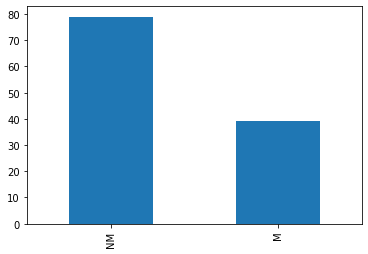

In [27]:
df['Married'].value_counts().plot(kind='bar')

In [28]:
tip = dfNM['Tip amount'].mean(), dfM['Tip amount'].mean()
tip

(7.025316455696203, 6.435897435897436)

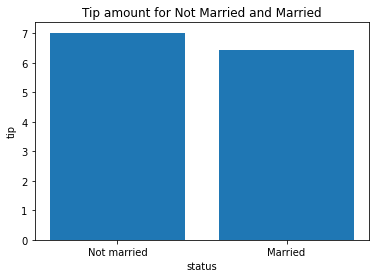

In [31]:
status = ['Not married', 'Married']
plt.bar(status, tip)
plt.title('Tip amount for Not Married and Married')
plt.xlabel('status')
plt.ylabel('tip')
plt.show()

In [33]:
df.sort_values('Culture')

,Tip amount,Time,Day,Culture,Married,Age
194,2,11.0,SAT,A,NM,4.0
142,5,15.0,MON,A,NM,30.0
130,5,14.0,SAT,A,NM,30.0
159,5,13.0,THUR,A,NM,20.0
215,4,13.0,MON,A,NM,30.0
...,...,...,...,...,...,...
178,4,15.0,SAT,W,NM,30.0
145,8,17.0,MON,W,NM,45.0
147,15,18.0,MON,W,NM,30.0
186,5,16.0,TUE,W,NM,20.0


In [34]:
df.loc[:, ['Tip amount', 'Culture']]

,Tip amount,Culture
116,20,P
117,5,W
118,5,E
119,3,M
120,6,W
...,...,...
229,10,W
230,1,I
231,5,W
232,3,W


In [35]:
dfCult = df.loc[:, ['Tip amount', 'Culture']]
dfCult

,Tip amount,Culture
116,20,P
117,5,W
118,5,E
119,3,M
120,6,W
...,...,...
229,10,W
230,1,I
231,5,W
232,3,W


<AxesSubplot:xlabel='Culture'>

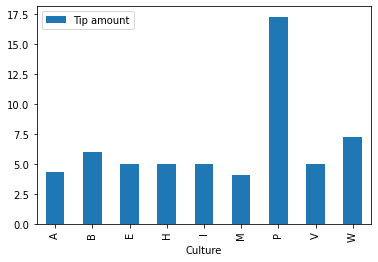

In [36]:
dfCult.groupby('Culture').mean().plot(kind='bar')

In [ ]:
df.groupby('Culture').mean().plot(kind='bar')

<AxesSubplot:>

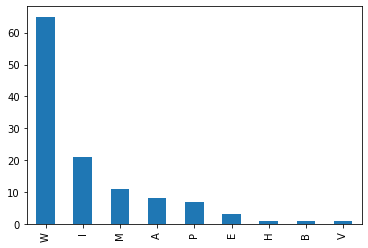

In [37]:
df['Culture'].value_counts().plot(kind='bar')